In [1]:
!rm -r boxmot

In [10]:
from tqdm.auto import tqdm

In [1]:
import torch
torch.ones(10).cuda()
torch.cuda.is_available()

True

In [1]:
!pip install ultralytics lapx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 19.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.2 MB/s eta 0:00:00


In [1]:
!yolo track model=yolov8l.pt source="Хоккей_короткое.mp4"  # Official Detect model

100%|███████████████████████████████████████| 83.7M/83.7M [00:00<00:00, 549MB/s]
Ultralytics YOLOv8.2.81 🚀 Python-3.11.7 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
YOLOv8l summary (fused): 268 layers, 43,668,288 parameters, 0 gradients, 165.2 GFLOPs

video 1/1 (frame 1/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 97.3ms
video 1/1 (frame 2/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 7.4ms
video 1/1 (frame 3/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 8.8ms
video 1/1 (frame 4/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 7.1ms
video 1/1 (frame 5/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 7.3ms
video 1/1 (frame 6/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 7.1ms
video 1/1 (frame 7/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 7.4ms
video 1/1 (frame 8/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 persons, 7.3ms
video 1/1 (frame 9/5345) /notebooks/Хоккей_короткое.mp4: 352x640 5 perso

In [3]:
!ffmpeg -i runs/detect/track2/Хоккей_короткое.avi -vf fps=30 -vcodec libx264 outputv3.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [11]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9a1ccc5f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

results = model.train(
    data="Hockey-Players-4/data.yaml",
    epochs=10,
    imgsz=640,
    device="cuda",
    pretrained=True,
    batch=64,
    workers=8,
    seed=56,
    cos_lr=True,
    weight_decay=2e-4,
    label_smoothing=0.0,
    dropout=0.0,
    optimizer='AdamW'
)

Ultralytics YOLOv8.2.81 🚀 Python-3.11.7 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=Hockey-Players-4/data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=56, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /notebooks/datasets/Hockey-Players-4/Hockey-Players-4/train/labels.cache... 2651 images, 306 backgrounds, 0 corrupt: 100%|██████████| 2651/2651 [00:00<?, ?it/s]
val: Scanning /notebooks/datasets/Hockey-Players-4/Hockey-Players-4/valid/labels.cache... 253 images, 23 backgrounds, 0 corrupt: 100%|██████████| 253/253 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0002), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      25.9G      2.319      9.524      2.085        193        640: 100%|██████████| 42/42 [00:26<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all        253       1846          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      25.7G      2.051      1.792      2.043        196        640: 100%|██████████| 42/42 [00:23<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        253       1846          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      25.3G      1.952      1.637       1.97        208        640: 100%|██████████| 42/42 [00:23<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all        253       1846     0.0407     0.0272    0.00489    0.00177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      25.7G       1.83      1.479      1.875        171        640: 100%|██████████| 42/42 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        253       1846     0.0685     0.0349     0.0135    0.00854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      25.8G      1.768      1.369      1.815        183        640: 100%|██████████| 42/42 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        253       1846      0.478      0.349      0.355      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      25.2G      1.706       1.21      1.747        152        640: 100%|██████████| 42/42 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        253       1846      0.361      0.355       0.29      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      25.7G      1.652      1.129      1.703        171        640: 100%|██████████| 42/42 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all        253       1846      0.733      0.586      0.653      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      25.3G      1.601      1.035      1.666        146        640: 100%|██████████| 42/42 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all        253       1846      0.866      0.772      0.867      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      25.3G      1.551     0.9512      1.628        148        640: 100%|██████████| 42/42 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        253       1846      0.937      0.785      0.908      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      25.7G      1.507     0.8954      1.602        208        640: 100%|██████████| 42/42 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all        253       1846      0.935      0.835      0.928      0.555



10 epochs completed in 0.074 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 52.0MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.11.7 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


                   all        253       1846      0.936      0.835      0.928      0.554
               Referee        150        232      0.946      0.823      0.918      0.539
                person        230       1614      0.925      0.847      0.937      0.569
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train9


lr/pg0,█▅▂▂▂▁▁▁▁▁
lr/pg1,▃▆█▇▆▅▄▂▂▁
lr/pg2,▃▆█▇▆▅▄▂▂▁
metrics/mAP50(B),▁▁▁▁▄▃▆███
metrics/mAP50-95(B),▁▁▁▁▃▂▅▇██
metrics/precision(B),▁▁▁▂▅▄▆▇██
metrics/recall(B),▁▁▁▁▄▄▆▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▄▃▃▂▂▁▁


In [5]:
!yolo track model=runs/detect/train11/weights/best.pt source=korotkoe_video.mp4 conf=0.05 device=cuda imgsz=[]

Ultralytics YOLOv8.2.81 🚀 Python-3.11.7 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
Model summary (fused): 218 layers, 25,847,866 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/5345) /notebooks/korotkoe_video.mp4: 352x640 2 humans, 2 players, 2 referees, 108.6ms
video 1/1 (frame 2/5345) /notebooks/korotkoe_video.mp4: 352x640 1 human, 4 players, 3 referees, 6.3ms
video 1/1 (frame 3/5345) /notebooks/korotkoe_video.mp4: 352x640 1 human, 5 players, 2 referees, 6.1ms
video 1/1 (frame 4/5345) /notebooks/korotkoe_video.mp4: 352x640 1 human, 6 players, 3 referees, 5.9ms
video 1/1 (frame 5/5345) /notebooks/korotkoe_video.mp4: 352x640 1 human, 5 players, 3 referees, 6.0ms
video 1/1 (frame 6/5345) /notebooks/korotkoe_video.mp4: 352x640 1 referee, 6.0ms
video 1/1 (frame 7/5345) /notebooks/korotkoe_video.mp4: 352x640 1 referee, 6.2ms
video 1/1 (frame 8/5345) /notebooks/korotkoe_video.mp4: 352x640 2 referees, 6.0ms
video 1/1 (frame 9/5345) /notebooks/korotkoe_video.mp4: 352x640 2

In [72]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.5/971.5 kB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 96.0 MB/s eta 0:00:00


In [143]:
from ultralytics import YOLO
import torch

model = YOLO("/notebooks/runs/detect/train15/weights/best.pt")  # load a pretrained model (recommended for training)

with torch.no_grad():
    results = model.track(
        source="./korotkoe_video.mp4",
        #imgsz=[1024,1024],
        show=True,
        #stream=True,
        conf=0.2
    )

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
The DISPLAY environment variable isn't set.


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/5345) /notebooks/korotkoe_video.mp4: 704x1280 (no detections), 108.6ms
video 1/1 (frame 2/5345) /notebooks/korotkoe_video.mp4: 704x1280 (no detections), 11.5ms
video 1/1 (frame 3/5345) /notebooks/korotkoe_video.mp4: 704x1280 (no detections), 11.3ms
video 1/1 (frame 4/5345) /notebooks/korotkoe_video.mp4: 704x1280 (no de

In [154]:
np.argmax([results[i].boxes.shape[0] for i in range(len(results))])

3003

In [161]:
results[3003].boxes.xyxy

tensor([[572.4822, 206.0522, 596.8987, 325.9261]], device='cuda:0')

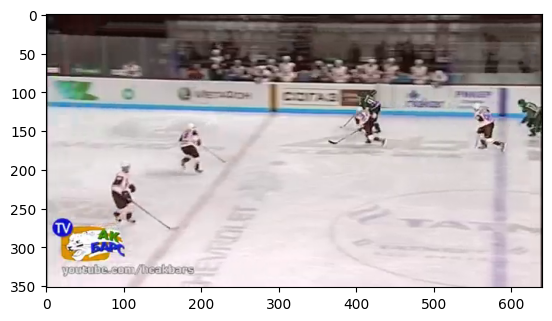

In [155]:
import matplotlib.pyplot as plt
plt.imshow(results[3003].orig_img)

In [2]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.5/971.5 kB 24.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 36.1 MB/s eta 0:00:0000:0100:01


In [72]:
import easyocr

reader = easyocr.Reader(['en'],gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [58]:
def img_crop(orig_image,bbox):
    x_0,y_0,x_1,y_1 = bbox.round().int().tolist()
    return orig_image[y_0:y_1,x_0:x_1,:]

In [100]:
cache = {}
cap = cv2.VideoCapture('korotkoe_video.mp4') 
ret, frame = cap.read()
for r in tqdm(results):
    orig_img = r.orig_img
    if len(r.boxes) == 0 or not r.boxes.is_track:
        continue
    
    for score,idu,typ,bbox in zip(r.boxes.conf.tolist(),r.boxes.id.tolist(),r.boxes.cls.tolist(),r.boxes.xyxy):
        #if typ != 1:
        #    continue
        crop_img = img_crop(orig_img,bbox)
        number = reader.readtext(crop_img,allowlist='0123456789')
        number = '' if number == [] else number[0][1]
        if idu not in cache.keys():
            cache[idu] = [{'conf':score,'number':number}]
        else:
            cache[idu] += [{'conf':score,'number':number}]

0it [00:00, ?it/s]


video 1/1 (frame 1/5345) /notebooks/korotkoe_video.mp4: 576x1024 1 player, 2 referees, 11.7ms
video 1/1 (frame 2/5345) /notebooks/korotkoe_video.mp4: 576x1024 1 player, 2 referees, 11.4ms
video 1/1 (frame 3/5345) /notebooks/korotkoe_video.mp4: 576x1024 1 player, 2 referees, 11.8ms
video 1/1 (frame 4/5345) /notebooks/korotkoe_video.mp4: 576x1024 2 referees, 11.7ms
video 1/1 (frame 5/5345) /notebooks/korotkoe_video.mp4: 576x1024 2 referees, 11.6ms
video 1/1 (frame 6/5345) /notebooks/korotkoe_video.mp4: 576x1024 2 referees, 11.6ms
video 1/1 (frame 7/5345) /notebooks/korotkoe_video.mp4: 576x1024 1 referee, 11.9ms
video 1/1 (frame 8/5345) /notebooks/korotkoe_video.mp4: 576x1024 1 player, 2 referees, 12.4ms
video 1/1 (frame 9/5345) /notebooks/korotkoe_video.mp4: 576x1024 1 player, 2 referees, 11.5ms
video 1/1 (frame 10/5345) /notebooks/korotkoe_video.mp4: 576x1024 2 referees, 11.7ms
video 1/1 (frame 11/5345) /notebooks/korotkoe_video.mp4: 576x1024 2 referees, 11.5ms
video 1/1 (frame 12/5345

In [101]:
all_n = []
for k in cache.keys():
    all_n += [x['number'] for x in cache[k]]

In [105]:
import numpy as np

up_cache = {}
for k in cache.keys():
    u, count = np.unique([x['number'] for x in cache[k]], return_counts=True)
    count_sort_ind = np.argsort(-count)
    for i in u[count_sort_ind]:
        if i != '':
            up_cache[k] = i
            break
    else:
        up_cache[k] = -100

In [127]:
df = pd.DataFrame()
df['number'] = [x for x in up_cache.values()]
df['id'] = [x for x in up_cache.keys()]

In [137]:
df.groupby('number').agg('count').value_counts()

id 
1      35
2       6
3       4
4       2
10      1
327     1
Name: count, dtype: int64

In [140]:
df.groupby('number').agg(lambda x:x.tolist())

,id
number,
-100,"[1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,..."
0,"[38.0, 191.0, 193.0, 207.0, 271.0, 274.0, 275...."
00,"[290.0, 294.0, 298.0]"
03,[237.0]
035,[83.0]
04,"[324.0, 385.0]"
05,"[75.0, 214.0, 242.0, 363.0]"
0543,[78.0]
06,[254.0]


In [2]:
import shutil
shutil.make_archive('./yolo_train_merge', 'zip', 'datasets/Players,-referee,-gates-hockey-5/runs/detect/train')

'/notebooks/yolo_train_merge.zip'